# Loading data

In [33]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [34]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [35]:
from gensim.models import Word2Vec
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import tarfile
import os
import json
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

In [36]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/wenwen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/wenwen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
def read_json(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            data.append(json.loads(line))
    
    return data

In [38]:
train_file_path = "./age/en/en.train.json"
train_data=read_json(train_file_path)

In [39]:
test_file_path = "./age/en/en.test.json"
test_data=read_json(test_file_path)

In [40]:
df_train = pd.DataFrame(train_data)
df_train.head()

,gender,age,id,text,age_exact
0,male,40s,238,Not the best overall service.,42
1,male,40s,239,Since it is the #1 social network however with...,42
2,male,40s,240,"Not only that you can find anything, but its r...",42
3,male,40s,241,I'm always satisfied with their level of servi...,42
4,male,30s,242,"On time, nice chap and worked like a pro - Ver...",32


In [41]:
df_train = df_train[df_train["age"]!= "80s"]
df_train = df_train[df_train["age"]!= "90s"]
df_train = df_train[df_train["age"]!= "100s"]
df_train = df_train[df_train["age"]!= "110s"]
len(df_train)

4866

In [42]:
df_test = pd.DataFrame(test_data)
df_test.head()

,gender,age,id,text,age_exact
0,female,50s,0,Used this site many times. I always start mys...,50
1,male,30s,1,Great prices!! and the fact that they will mat...,32
2,male,40s,2,Used Ebay for sales and purchases for the past...,48
3,male,40s,3,Used Paypal for my buying and selling for the ...,48
4,male,40s,4,I ordered on April 30 and finally received my ...,48


In [43]:
df_test = df_test[df_test["age"]!= "80s"]
df_test = df_test[df_test["age"]!= "90s"]
df_test = df_test[df_test["age"]!= "100s"]
df_test = df_test[df_test["age"]!= "110s"]
len(df_test)

393

In [44]:
col = ['age', 'text']
df_train= df_train[col]
print(df_train)

      age                                               text
0     40s                      Not the best overall service.
1     40s  Since it is the #1 social network however with...
2     40s  Not only that you can find anything, but its r...
3     40s  I'm always satisfied with their level of servi...
4     30s  On time, nice chap and worked like a pro - Ver...
...   ...                                                ...
4991  60s  Having read previous reviews I am surprised at...
4992  60s  I intially contacted your customer service dep...
4993  60s       Well priced product and arrived very quickly
4994  60s   Love the variety of Brands and ease in ordering!
4995  70s  I would recommend this web site to anyone want...

[4866 rows x 2 columns]


In [45]:
col = ['age', 'text']
df_test= df_test[col]
print(df_test)

     age                                               text
0    50s  Used this site many times.  I always start mys...
1    30s  Great prices!! and the fact that they will mat...
2    40s  Used Ebay for sales and purchases for the past...
3    40s  Used Paypal for my buying and selling for the ...
4    40s  I ordered on April 30 and finally received my ...
..   ...                                                ...
398  70s  I found in all my dealings with Lightinthebox ...
399  70s  As I live in middle Italy, I don't travel to t...
400  60s  If people don't know, by now, what to expect f...
401  60s  Our first experience staying in Croatia in May...
402  60s  I was looking for Euros for a forthcoming trip...

[393 rows x 2 columns]


In [46]:
def tokenize_text(text):
    return word_tokenize(text)

df_train['tokenized_text'] = df_train['text'].apply(tokenize_text)
df_test['tokenized_text'] = df_test['text'].apply(tokenize_text)

X_train = df_train['tokenized_text']
Y_train = df_train['age']
X_test = df_test['tokenized_text']
Y_test = df_test['age']

In [47]:
print(X_train)

0                   [Not, the, best, overall, service, .]
1       [Since, it, is, the, #, 1, social, network, ho...
2       [Not, only, that, you, can, find, anything, ,,...
3       [I, 'm, always, satisfied, with, their, level,...
4       [On, time, ,, nice, chap, and, worked, like, a...
                              ...                        
4991    [Having, read, previous, reviews, I, am, surpr...
4992    [I, intially, contacted, your, customer, servi...
4993    [Well, priced, product, and, arrived, very, qu...
4994    [Love, the, variety, of, Brands, and, ease, in...
4995    [I, would, recommend, this, web, site, to, any...
Name: tokenized_text, Length: 4866, dtype: object


In [48]:
print(Y_train)

0       40s
1       40s
2       40s
3       40s
4       30s
       ... 
4991    60s
4992    60s
4993    60s
4994    60s
4995    70s
Name: age, Length: 4866, dtype: object


In [49]:
def preprocess_text(tokenized_text):
    
    tokenized_text = [word for word in tokenized_text if word not in string.punctuation]
    tokenized_text = [word.lower() for word in tokenized_text]
    stop_words = set(stopwords.words('english'))
    tokenized_text = [word for word in tokenized_text if word not in stop_words]
    tokenized_text = [word for word in tokenized_text if not word.isdigit()]

    return tokenized_text


X_train = X_train.apply(preprocess_text)
X_test = X_test.apply(preprocess_text)

In [50]:
print(X_train)

0                                [best, overall, service]
1       [since, social, network, however, take, leave,...
2              [find, anything, resources, apps, awesome]
3       ['m, always, satisfied, level, service, compet...
4       [time, nice, chap, worked, like, pro, happy, s...
                              ...                        
4991    [read, previous, reviews, surprised, odd, one,...
4992    [intially, contacted, customer, service, depar...
4993            [well, priced, product, arrived, quickly]
4994              [love, variety, brands, ease, ordering]
4995    [would, recommend, web, site, anyone, wanting,...
Name: tokenized_text, Length: 4866, dtype: object


In [51]:
print(Y_train)

0       40s
1       40s
2       40s
3       40s
4       30s
       ... 
4991    60s
4992    60s
4993    60s
4994    60s
4995    70s
Name: age, Length: 4866, dtype: object


# Tf-idf as Embedding

In [52]:
def join_tokens(tokens):
    return ' '.join(tokens)

X_train_str = X_train.apply(join_tokens)
X_test_str = X_test.apply(join_tokens)

tfidf_vectorizer = TfidfVectorizer()

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_str)
X_test_tfidf = tfidf_vectorizer.transform(X_test_str)

models = {
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Naive Bayes": MultinomialNB()
}

results = {}
for name, model in models.items():
    model.fit(X_train_tfidf, Y_train)
    y_pred = model.predict(X_test_tfidf)
    acc = accuracy_score(Y_test, y_pred)
    results[name] = acc

for name, acc in results.items():
    print(f"{name}: Accuracy = {acc}")

Random Forest: Accuracy = 0.2875318066157761
SVM: Accuracy = 0.3053435114503817
Naive Bayes: Accuracy = 0.2544529262086514


# Word2vec as Embedding

In [53]:
def create_word2vec_model(sentences, vector_size=100, window=2, min_count=1):

    word2vec_model = Word2Vec(sentences=sentences, vector_size=vector_size, window=window, min_count=min_count)
    word2vec_words = set(word2vec_model.wv.index_to_key)

    return word2vec_model, word2vec_words

In [54]:
word2vec_model_train, word2vec_words_train = create_word2vec_model(X_train)
word2vec_model_test, word2vec_words_test = create_word2vec_model(X_test)

In [55]:
def compute_sentence_vectors(X, word2vec_model):

    sentence_vectors = []

    for sentence in X:
        word_vectors = [word2vec_model.wv[word] for word in sentence if word in word2vec_model.wv]
        if word_vectors:
            sentence_vector = sum(word_vectors) / len(word_vectors)
        else:
            sentence_vector = np.zeros(word2vec_model.vector_size)
        sentence_vectors.append(sentence_vector)

    return sentence_vectors

In [56]:
X_train_vectors= compute_sentence_vectors(X_train, word2vec_model_train)
X_test_vectors= compute_sentence_vectors(X_test, word2vec_model_test)

/Users/wenwen/anaconda3/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/wenwen/anaconda3/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/wenwen/anaconda3/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/wenwen/anaconda3/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/wenwen/anacon

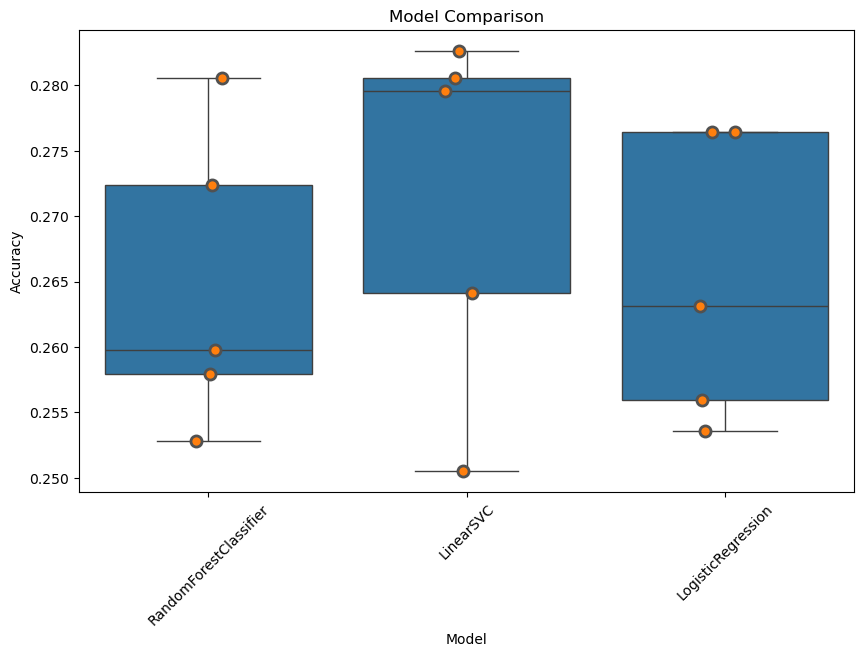

In [57]:
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    #MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame()  # Initialize an empty DataFrame
entries = []

for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X_train_vectors, Y_train, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))

# Create DataFrame from entries
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

# Plotting
plt.figure(figsize=(10, 6))
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()


In [58]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.271480
LogisticRegression        0.265107
RandomForestClassifier    0.264695
Name: accuracy, dtype: float64